In [235]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [236]:
train_data = pd.DataFrame(pd.read_excel("Right_turn_90deg_w_bump #1_train.xlsx"))
test_data = pd.DataFrame(pd.read_excel("Right_turn_90deg_w_bump #1_test.xlsx"))

In [237]:
train_data = train_data.drop(['Unnamed: 0','Time'], axis = 1)
test_data = test_data.drop(['Unnamed: 0','Time'], axis = 1)

Train and test

In [238]:
Y_train,Y_test = train_data['Label'],test_data['Label']
X_train,X_test = train_data[['Ax','Ay','Az','Gx','Gy','Gz']],test_data[['Ax','Ay','Az','Gx','Gy','Gz']]

CV

In [239]:
x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train, test_size=0.2)

## Random forest

In [240]:
rf_model = RandomForestClassifier(n_estimators=150, max_depth=3, random_state=0)

In [241]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=150, random_state=0)

on cv

In [242]:
y_predicted = rf_model.predict(x_test)

In [243]:
rf_model.score(x_test, y_test)

0.9664179104477612

on Test

In [244]:
y_predicted_test = rf_model.predict(X_test)
rf_model.score(X_test, Y_test)

0.9233038348082596

In [245]:
#print(y_predicted_test)

## KNN Classifier

on cv

In [246]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_predicted_knn = knn.predict(x_test)
knn.score(x_test, y_test)

0.9701492537313433

on Test

In [247]:
y_predicted_test = knn.predict(X_test)
knn.score(X_test, Y_test)

0.9056047197640118

Text(69.0, 0.5, 'Truth')

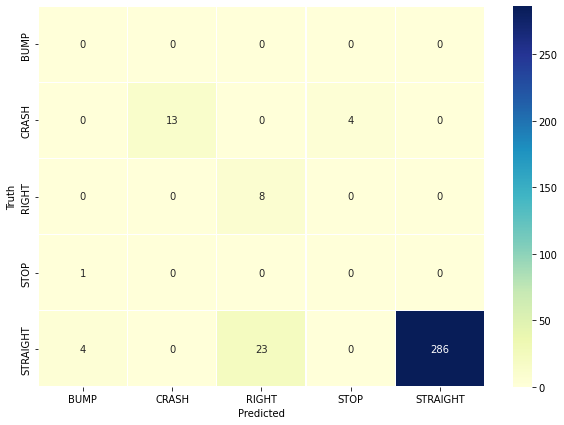

In [248]:
plt.figure(figsize=(10, 7))
class_labels = [ 'BUMP', 'CRASH', 'RIGHT',  'STOP', 'STRAIGHT']
cm = confusion_matrix(knn.predict(X_test), Y_test)
sn.heatmap(cm,  xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## SVM

In [254]:
svm_model = SVC(C =150 ,kernel = 'rbf')
svm_model.fit(x_train, y_train)
svm_model.score(x_test, y_test)

0.9850746268656716

In [255]:
Y_predicted = svm_model.predict(X_test)
svm_model.score(X_test,Y_test)

0.8938053097345132